In [4]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
from helpers import (readMaster, baskod2010tobasomrade, byGender, appendNewDatapoints, plotcombined)

Read data

In [6]:
master = readMaster()

In [27]:
df = master[['year', 'BASKODER', 'Fst_Andel_Småhus inklusive Fritidshus', 'Fst_Andel_Hyreshus']]

In [28]:
df = df.rename(columns={
    'BASKODER': 'BASKOD2010',
    'Fst_Andel_Småhus inklusive Fritidshus': 'andel_sma',
    'Fst_Andel_Hyreshus': 'andel_hyr'
})

In [29]:
df = baskod2010tobasomrade(df, n_numeric=2)

In [30]:
df['year'] = pd.to_datetime(df['year'])

In [31]:
df['year'] = df['year'].apply(lambda t: t.year)

In [32]:
df = df[(df['year'] >= 2012) & (df['year'] <= 2016)]

Export

In [33]:
concept = 'andel_smahus'

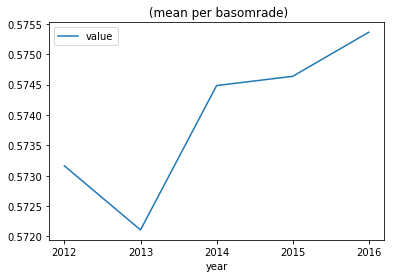

In [34]:
out = df[['basomrade', 'year', 'andel_sma']].copy().rename(columns={'andel_sma': 'value'})
out = appendNewDatapoints(concept, out, new=True)
plotcombined(out)

In [35]:
concept = 'andel_hyreshus'

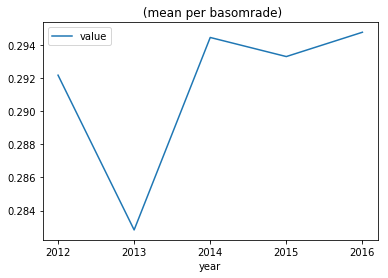

In [36]:
out = df[['basomrade', 'year', 'andel_hyr']].copy().rename(columns={'andel_hyr': 'value'})
out = appendNewDatapoints(concept, out, new=True)
plotcombined(out)

`ddf--concepts.csv`